In [1]:
import torch
from normalizing_flows import Flow
from normalizing_flows.architectures import RealNVP
import matplotlib.pyplot as plt
import numpy as np

from shapes import caret, double_circle, n_regular_polygon, grid, swiss_roll, swirl, moons
from utils import generate_continuously_colored_samples, generate_grid_data

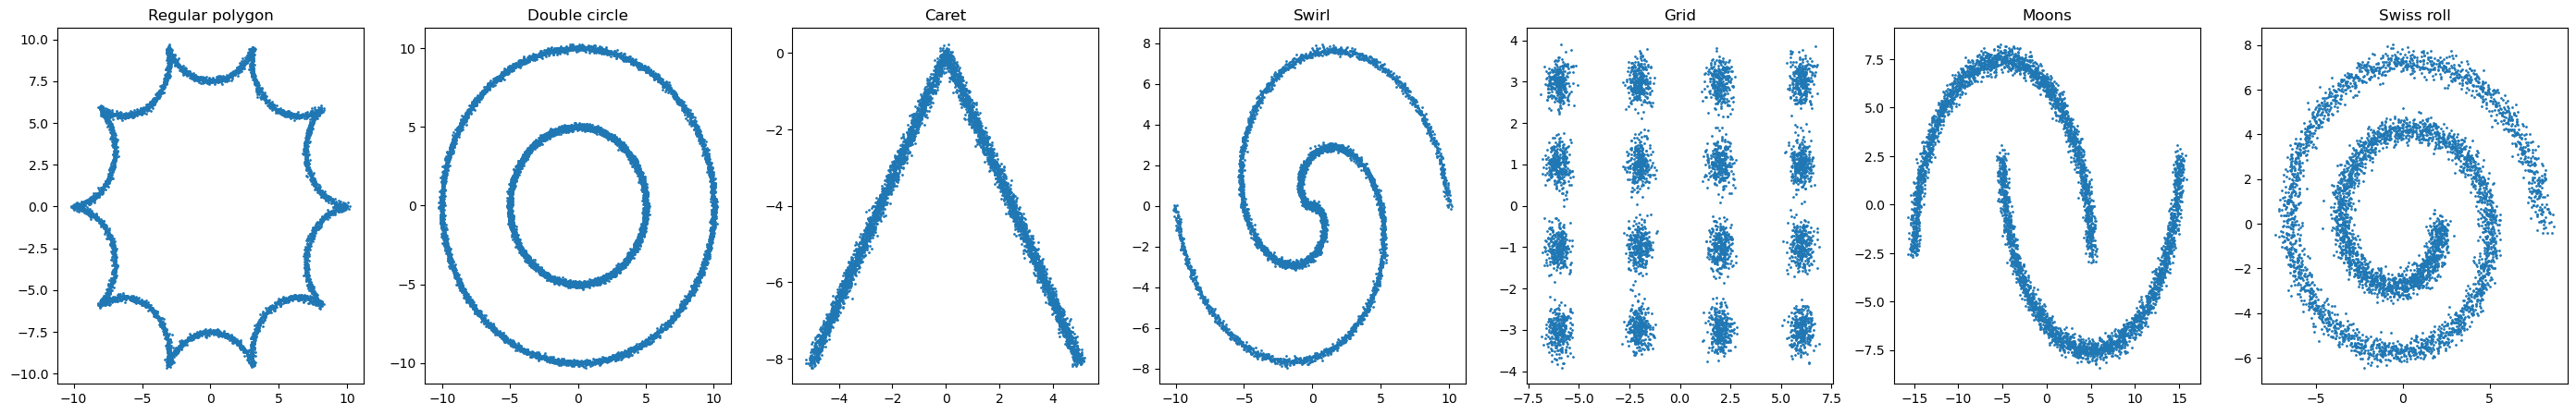

In [2]:
num_points = 5000

data_regular_polygon = n_regular_polygon(n=10, radius=10, angle=0, arc_height=2, num_points=num_points, noise_std=0.1, seed=0)
data_double_circle = double_circle(radius1=10, radius2=5, num_points=num_points, noise_std=0.1, seed=0)
data_caret = caret(line_length=10, angle=45, num_points=num_points, noise_std=0.1, seed=0)
data_swirl = swirl(radius=10, angle=0, num_points=num_points, noise_std=0.1, seed=0)
data_grid = grid(n=4, dist=(4, 2), num_points=num_points, noise_std=0.3, seed=0)
data_moons = moons(radius=10, angle=0, shift=None, num_points=num_points, noise_std=0.3, seed=0)
data_swiss_roll = swiss_roll(radius1=8, radius2=2, num_revolutions=2, num_points=num_points, noise_std=0.3, seed=0)


# Plotting the generated points
ax, fig = plt.subplots(1, 7, figsize=(35, 5))
fig[0].scatter(data_regular_polygon[0], data_regular_polygon[1], s=1)
fig[0].set_title("Regular polygon")
fig[1].scatter(data_double_circle[0], data_double_circle[1], s=1)
fig[1].set_title("Double circle")
fig[2].scatter(data_caret[0], data_caret[1], s=1)
fig[2].set_title("Caret")
fig[3].scatter(data_swirl[0], data_swirl[1], s=1)
fig[3].set_title("Swirl")
fig[4].scatter(data_grid[0], data_grid[1], s=1)
fig[4].set_title("Grid")
fig[5].scatter(data_moons[0], data_moons[1], s=1)
fig[5].set_title("Moons")
fig[6].scatter(data_swiss_roll[0], data_swiss_roll[1], s=1)
fig[6].set_title("Swiss roll")
plt.show()

In [3]:
torch.manual_seed(0)

data_tensor = torch.tensor(np.stack(data_caret, axis=1)).float()  # Create a tensor from the data

n_data = num_points * 2
n_dim = 2

bijection = RealNVP(n_dim)  # Create the bijection
flow = Flow(bijection)  # Create the normalizing flow

flow.fit(data_tensor)  # Fit the normalizing flow to training data
log_prob = flow.log_prob(data_tensor)  # Compute the log probability of training data
x_new = flow.sample(50)  # Sample 50 new data points

print(log_prob.shape)  # (100,)


torch.Size([5000])


In [4]:
print(x_new.shape) 

torch.Size([50, 2])


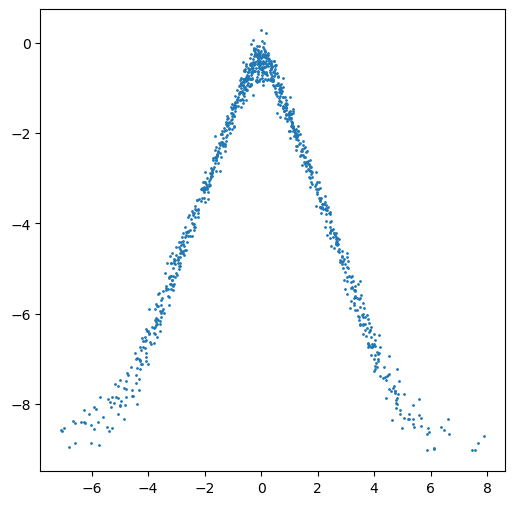

In [5]:
x_new = flow.sample(1000)  # Sample 1000 new data points

# revert x_new to numpy array
x_new = x_new.detach().numpy()

# plot new data
plt.figure(figsize=(6,6))
plt.scatter(x_new[:,0], x_new[:,1], s=1)
plt.show()

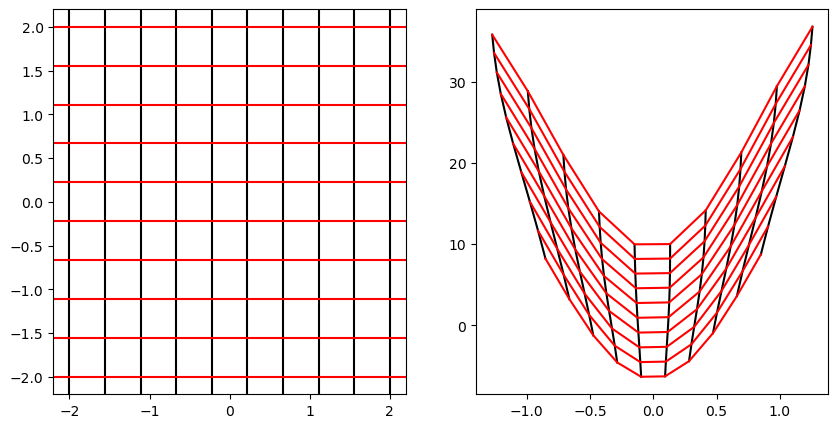

In [6]:
x_min, x_max = -2, 2
y_min, y_max = -2, 2
x_tick, y_tick = 10, 10

grid_points = generate_grid_data([x_min, x_max], [y_min, y_max], x_tick, y_tick)

# transform grid points
transformed_grid_points = flow.bijection(grid_points)

# revert transformed grid points to numpy array
transformed_grid_points = transformed_grid_points[0].detach().numpy()

# plot grid_points as grid with vertical lines being black and horizontal lines being red
ax, fig = plt.subplots(1, 2, figsize=(10, 5))
for i in range(x_tick):
    fig[0].axvline(x=grid_points[i*y_tick,0], color='black')
    fig[1].plot(transformed_grid_points[i*y_tick:i*y_tick+y_tick,0], transformed_grid_points[i*y_tick:i*y_tick+y_tick,1], color='black')
for i in range(y_tick):
    fig[0].axhline(y=grid_points[i,1], color='red')
    fig[1].plot(transformed_grid_points[i::y_tick,0], transformed_grid_points[i::y_tick,1], color='red')


plt.show()


In [9]:
colored_data = generate_continuously_colored_samples(1000)

data = colored_data[:-1]
torch_data = torch.tensor(data).float()  # Create a tensor from the data
color = colored_data[-1]

# transform colored data
transformed_data = flow.bijection(data)
# revert transformed data to numpy array
transformed_data = transformed_data[0].detach().numpy()

# plot
ax, fig = plt.subplots(1, 2, figsize=(10, 5))
fig[0].scatter(data[0], data[1], s=1, c=color)
fig[1].scatter(transformed_data[:,0], transformed_data[:,1], s=1, c=color)
plt.show()

AttributeError: 'tuple' object has no attribute 'shape'